# PISA 2012 Dataset Exploration
## by Vyacheslav Yamont

## Preliminary Wrangling

This document explores The Programme for International Student Assessment (PISA) 2012 Dataset. PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb

%matplotlib inline

# Setup plot parameters
sb.set()
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'xx-large',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large'
}
plt.rcParams.update(params)

The original dataset contains 485490 rows and 636 columns. For our analysis the dataset was reduced to 9 columns of interest. The data wrangling process is described [here](./wrangle.ipynb).

Let's load the cleaned data to pandas DataFrame.

In [2]:
df = pd.read_csv('data/pisa2012_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           485490 non-null  int64  
 1   Country              485490 non-null  object 
 2   Gender               485490 non-null  object 
 3   Number of Computers  473459 non-null  object 
 4   Programming Rate     312425 non-null  object 
 5   Math                 485490 non-null  float64
 6   Reading              485490 non-null  float64
 7   Science              485490 non-null  float64
 8   Wealth Index         479597 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 33.3+ MB


In [4]:
# Convert computers_number and programming into ordered categorical types
ordinal_var_dict = {
    'Number of Computers': ['None', 'One', 'Two', 'Three or more'],
    'Programming Rate':
    ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(
        ordered=True, categories=ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# Convert gender to unordered categorical type
cat_var = pd.api.types.CategoricalDtype(ordered=False,
                                        categories=['Male', 'Female'])
df['Gender'] = df['Gender'].astype(cat_var)

# Convert country to unordered categorical type
cat_var = pd.api.types.CategoricalDtype(ordered=False,
                                        categories=df.Country.unique())
df['Country'] = df['Country'].astype(cat_var)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Unnamed: 0           485490 non-null  int64   
 1   Country              485490 non-null  category
 2   Gender               485490 non-null  category
 3   Number of Computers  473459 non-null  category
 4   Programming Rate     312425 non-null  category
 5   Math                 485490 non-null  float64 
 6   Reading              485490 non-null  float64 
 7   Science              485490 non-null  float64 
 8   Wealth Index         479597 non-null  float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 20.4 MB


### What is the structure of your dataset?

The dataset contains 485490 students and describes 9 features (country, gender, number of computers, interest in programming, math, reading and science scores, family wealth index). Country and gender are categorical variables, all others are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

I’m most interested in figuring out how gender, country and computer programming influence academic performance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that number of computers and programming skills have a great impact on knowledge of a student, especially on the math score. I also think that gender and wealth score don’t have any statistically significant effect.

## Univariate Exploration

Let's look at descriptive statistics first.

In [6]:
df.describe()

,Unnamed: 0,Math,Reading,Science,Wealth Index
count,485490.000000,485490.000000,485490.000000,485490.000000,479597.00000
mean,242744.500000,469.651234,472.006964,475.808094,-0.33701
std,140149.035432,100.786610,98.863310,97.998470,1.21530
min,0.000000,54.767080,6.445400,25.158540,-6.65000
25%,121372.250000,396.019620,405.044200,405.762800,-1.04000
50%,242744.500000,465.734520,475.477980,475.512860,-0.30000
75%,364116.750000,540.123060,542.831195,546.381920,0.43000
max,485489.000000,903.107960,849.359740,857.832900,3.25000


### Distribution of Subject Scores

I'll start by looking at the distribution of the main variables of interest: math, reading and science scores.

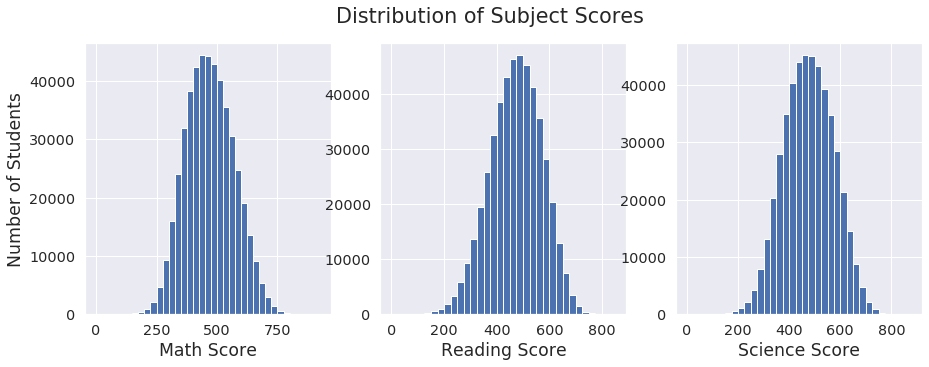

In [7]:
# Select bin size
binsize = 25

plt.figure(figsize=[15, 5])
plt.suptitle('Distribution of Subject Scores', size='xx-large')

# Plot Math
plt.subplot(1, 3, 1)
bins = np.arange(0, df['Math'].max()+binsize, binsize)
plt.hist(data = df, x = 'Math', bins = bins)
plt.xlabel('Math Score')
plt.ylabel('Number of Students')

# Plot Reading
plt.subplot(1, 3, 2)
bins = np.arange(0, df['Reading'].max()+binsize, binsize)
plt.hist(data = df, x = 'Reading', bins = bins)
plt.xlabel('Reading Score')

# Plot Science
plt.subplot(1, 3, 3)
bins = np.arange(0, df['Science'].max()+binsize, binsize)
plt.hist(data = df, x = 'Science', bins = bins)
plt.xlabel('Science Score')

# Save
plt.savefig('img/scores_dist.png', dpi=200, bbox_inches="tight");

All scores look normally distributed.

### Number of Students per Contry

In [8]:
base_color = sb.color_palette()[0]

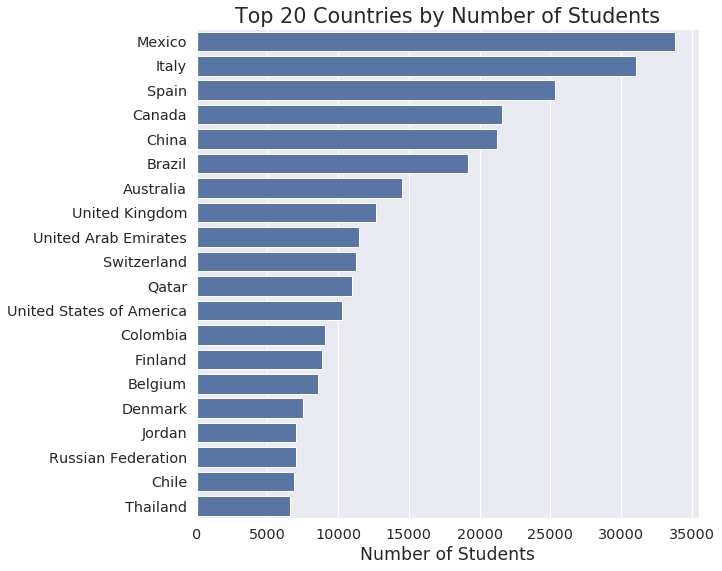

In [9]:
# Get top20 countries
data = df['Country'].value_counts().head(20)

# Plot
plt.figure(figsize=[9, 9])
sb.countplot(data=df, y='Country', order=data.index, color=base_color)
plt.title('Top 20 Countries by Number of Students')
plt.xlabel('Number of Students')
plt.ylabel(None)

# Save
plt.savefig('img/top20_countries.png', dpi=200, bbox_inches="tight")

The most active countries are Mexico, Italy and Spain. It seems that only several countries provided significantly more students.

Let's look at the distribution.

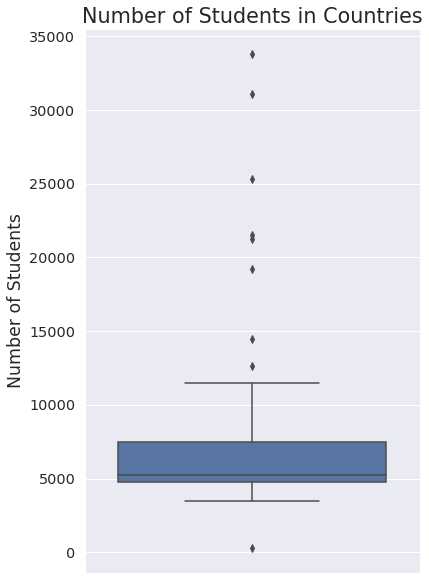

In [10]:
# Plot
plt.figure(figsize=(6,10))
sb.boxplot(df['Country'].value_counts(), orient="v", color=base_color)
plt.title('Number of Students in Countries')
plt.ylabel('Number of Students')

# Save
plt.savefig('img/students_countries.png', dpi=200, bbox_inches="tight")

So on average there were around 5000 students per country with an interquartile range around 3000 students.

### Family Number of Computers

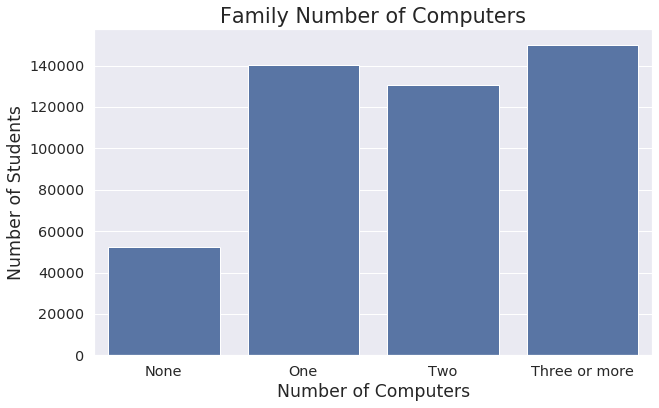

In [11]:
# Plot
sb.countplot(data=df,
             x='Number of Computers',
             order=['None', 'One', 'Two', 'Three or more'],
             color=base_color)
plt.title('Family Number of Computers')
plt.ylabel('Number of Students')

# Save
plt.savefig('img/computer_num.png', dpi=200, bbox_inches="tight")

It seems that families with no computer at all are rare. Interesting fact is that having three or more computers is more common than having one or two computers.

### Programming Rate

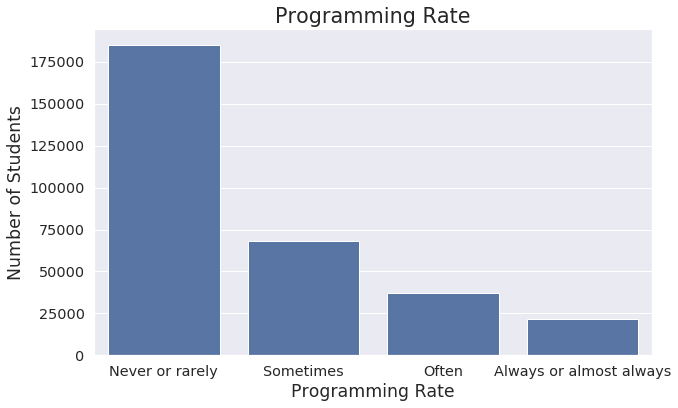

In [12]:
# Plot
sb.countplot(data=df, x='Programming Rate', color=base_color)
plt.title('Programming Rate')
plt.ylabel('Number of Students')

# Save
plt.savefig('img/programming.png', dpi=200, bbox_inches="tight")

Distribution looks as it supposed to be. The number of students who use programming is far less than those who never use it.

### Wealth Index

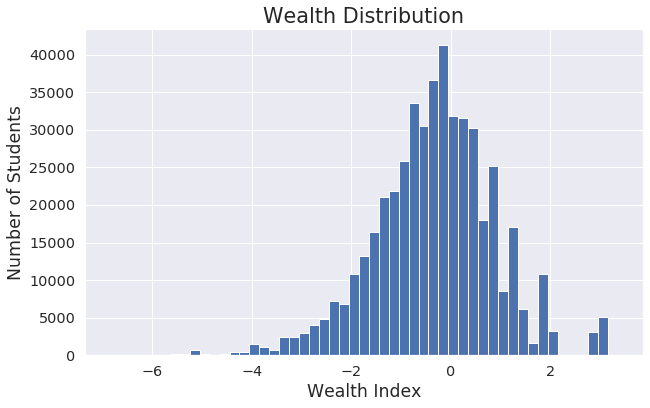

In [13]:
# Create appropriate bins
binsize = 0.2
bins = np.arange(df['Wealth Index'].min()-binsize, df['Wealth Index'].max()+binsize, binsize)

# Plot
plt.hist(data = df, x = 'Wealth Index', bins = bins)
plt.title('Wealth Distribution')
plt.ylabel('Number of Students')
plt.xlabel('Wealth Index')

# Save
plt.savefig('img/wealth_dist.png', dpi=200, bbox_inches="tight")

Wealth distribution has a slight skew to the left. Also we can notice several outliers at the high side.

Let's look closer to students with wealth index higher than 1 (standard deviation of wealth index).

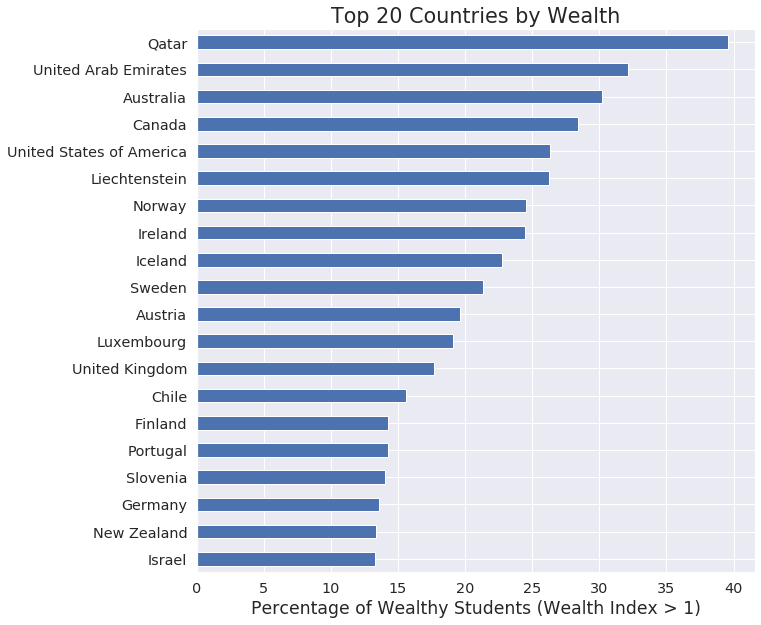

In [14]:
# Create a copy
df_copy = df.copy()

# Create wealthy property
df_copy['wealthy'] = df_copy['Wealth Index'] > 1

# Find percentage of wealthy by country
dep = df_copy.groupby('Country').wealthy.mean().mul(100)

# Plot
plt.figure(figsize=[10, 10])
dep.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Countries by Wealth')
plt.xlabel('Percentage of Wealthy Students (Wealth Index > 1)')
plt.ylabel(None)

# Save
plt.savefig('img/top20_wealthy.png', dpi=200, bbox_inches="tight")

We have very interesting and partly surprising results here.

### Top Countries with outperforming students

In [15]:
def best_score_countries(score):
    # Create a copy
    df_copy = df.copy()

    # Take upper quartile
    thr = df_copy[score].max() * 0.75

    # Create outperform property
    df_copy['outperform'] = df_copy[score] > thr

    # Find percentage of outperform by country
    dep = df_copy.groupby('Country').outperform.mean().mul(100)

    # Plot
    dep.sort_values().tail(5).plot(kind='barh')
    plt.xlim(0, dep.max() + 10)
    plt.title(score)
    plt.xlabel(None)
    plt.ylabel(None)

    # Write the total number after the bar
    indexes, labels = plt.yticks()
    for index, label in zip(indexes, labels):
        val = dep[label.get_text()]
        plt.text(y=index, x=val, s='{:.1f}%'.format(val), va='center')

    #remove x-ticks
    plt.tick_params(axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False)

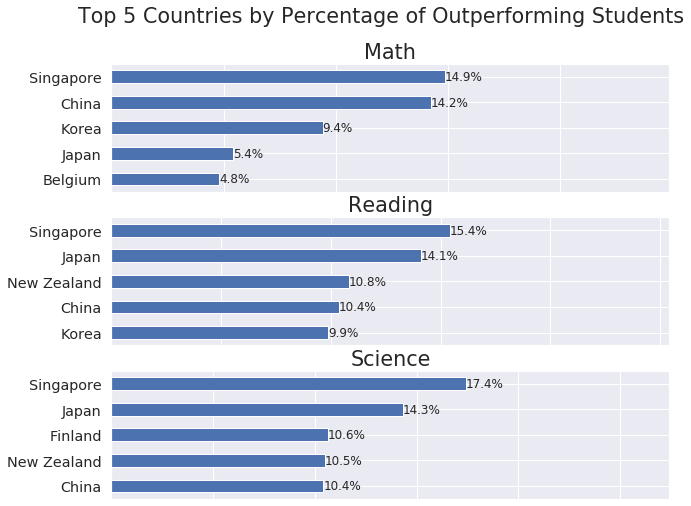

In [16]:
plt.figure(figsize=[10, 8])
plt.suptitle('Top 5 Countries by Percentage of Outperforming Students',
             size='xx-large')

# Plot Math
plt.subplot(3, 1, 1)
best_score_countries('Math')

# Plot Reading
plt.subplot(3, 1, 2)
best_score_countries('Reading')

# Plot Science
plt.subplot(3, 1, 3)
best_score_countries('Science')

# Save
plt.savefig('img/top5_outperforming.png', dpi=200, bbox_inches="tight")

Singapore students are well known for their exceptional level of education.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are outliers for number of students per countries and wealth scores. But it's absoulutely normal and nothing should be done with that.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I haven't noticed any unusual distributions in the data. My cleaning process is described [here](./wrangle.ipynb).

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

### Correlation

In [17]:
numeric_vars = ['Math', 'Reading', 'Science', 'Wealth Index']
categoric_vars = ['Gender', 'Number of Computers', 'Programming Rate']

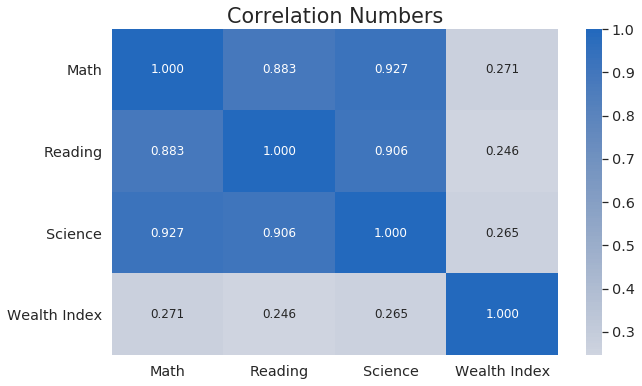

In [18]:
# Correlation plot
sb.heatmap(df[numeric_vars].corr(),
           annot=True,
           fmt='.3f',
           cmap='vlag_r',
           center=0)
plt.yticks(rotation=0)
plt.title('Correlation Numbers')

# Save
plt.savefig('img/numeric_heatmap.png', dpi=200, bbox_inches="tight")

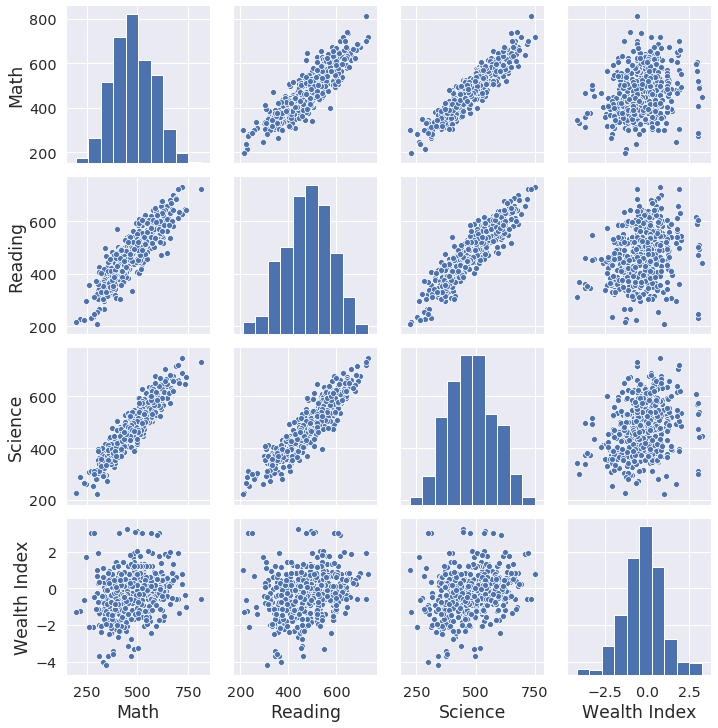

In [19]:
# Plot matrix: sample 500 students so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace=False)
students_samp = df.loc[samples, :]

sb.pairplot(data=students_samp, vars=numeric_vars)

# Save
plt.savefig('img/numeric_pairplot.png', dpi=200, bbox_inches="tight")

We can see a very strong correlation between math, reading and science scores. It means successful students in common are successful in all subjects simultaneously. And we can see a very weak correlation between scores and wealth. It confirms my earlier suggestions about wealth level and academic performance. Wealth level is not a factor of being a successful student.

An interesting fact is that math and science has the highest correlation. The science and reading correlation takes 2nd place. And the math and reading correlation is the weakest out of three.

Let's look how scores correlate with categorical variables: gender, number of computers and programming.

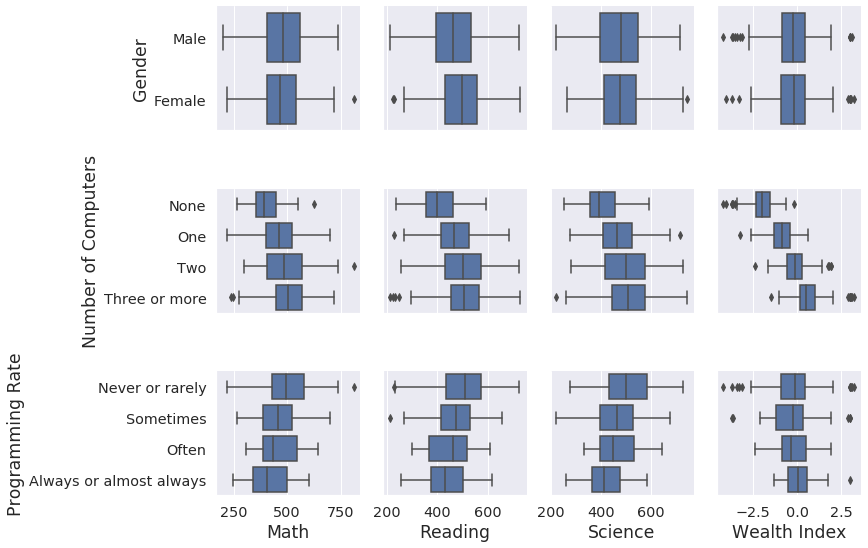

In [20]:
def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color=base_color)


g = sb.PairGrid(data=students_samp,
                x_vars=numeric_vars,
                y_vars=categoric_vars)
g.map(boxgrid)

# Save
plt.savefig('img/cat_boxplots.png', dpi=200, bbox_inches="tight")

We can notice interesting patterns here. Let's look at them closer.

### Scores and Gender

In [21]:
def barplot_scores(var, title):
    # Group data by var and calculate mean scores
    data = df.groupby(var)[['Math', 'Reading', 'Science']].mean()

    # Plot barplot
    ax = data.plot.bar(figsize=(10, 6), rot=0)
    plt.ylabel('Scores')
    plt.title(title, size=20)
    
    return ax

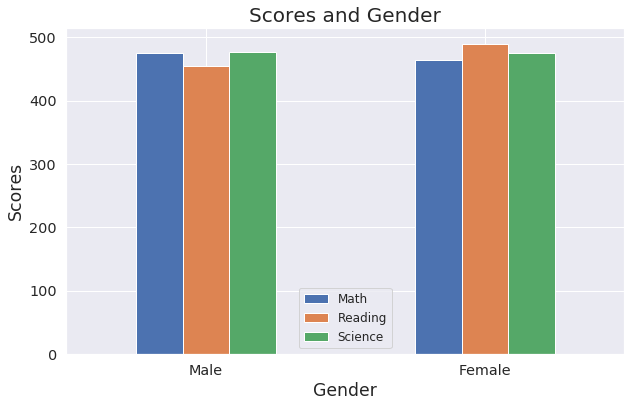

In [22]:
barplot_scores('Gender', 'Scores and Gender')

# Save
plt.savefig('img/gender_scores.png', dpi=200, bbox_inches="tight")

We can see that the average scores don't differ much between genders, but distributions are different. We can notice that male students are equally good at math and science, but slightly bad in reading. On the contrary, female students are good in reading but slightly bad in math and a little bit better in science.

### Scores and Number of Computers

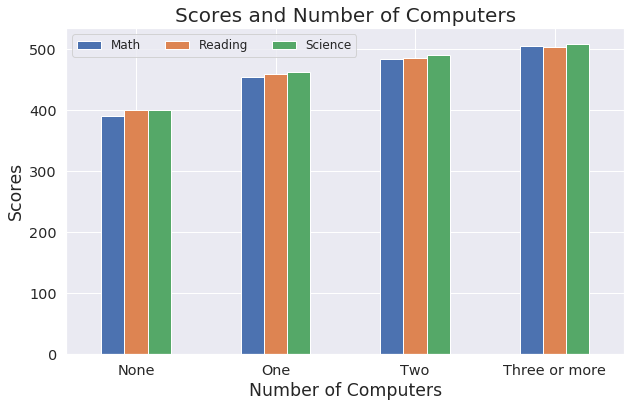

In [23]:
ax = barplot_scores('Number of Computers', 'Scores and Number of Computers')
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# Save
plt.savefig('img/computers_scores.png', dpi=200, bbox_inches="tight")

We can see that the more computers a family has, the better students' scores.

### Scores and Programming Rate

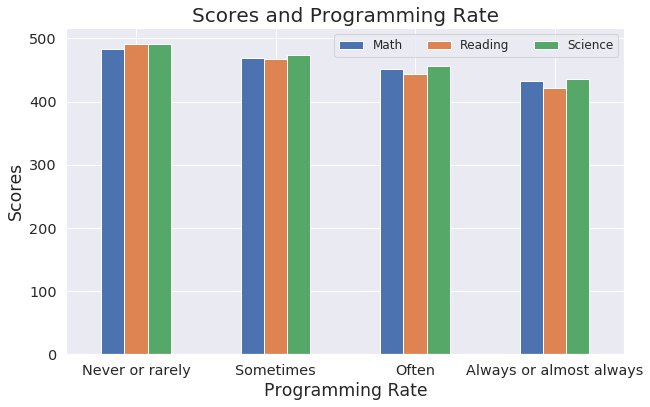

In [24]:
ax = barplot_scores('Programming Rate', 'Scores and Programming Rate')
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# Save
plt.savefig('img/programming_scores.png', dpi=200, bbox_inches="tight")

Here we get unexpected results. The higher the rate of programming, the worse students' scores. Maybe programming takes a lot of time and there is no time left for learning.

### Gender and Programming Rate

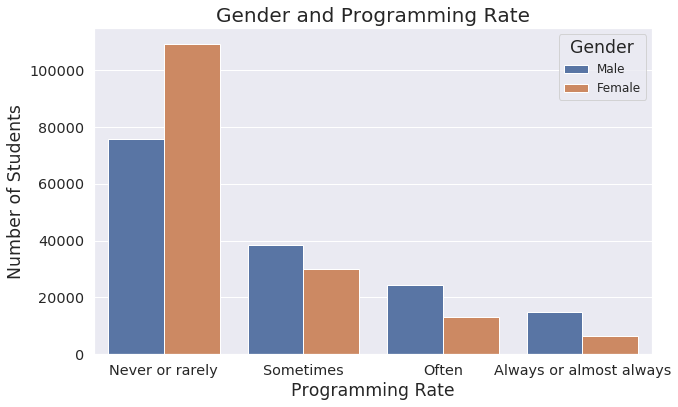

In [25]:
plt.figure(figsize = [10, 6])

sb.countplot(data = df, x = 'Programming Rate', hue = 'Gender')
plt.ylabel('Number of Students')
plt.title('Gender and Programming Rate', size=20)

# Save
plt.savefig('img/gender_programming.png', dpi=200, bbox_inches="tight")

We can see that males programming rate is higher. And also the number of female students who never or rarely use programming  is higher. So on average males like programming more than females.

### Number of Computers and Wealth Index

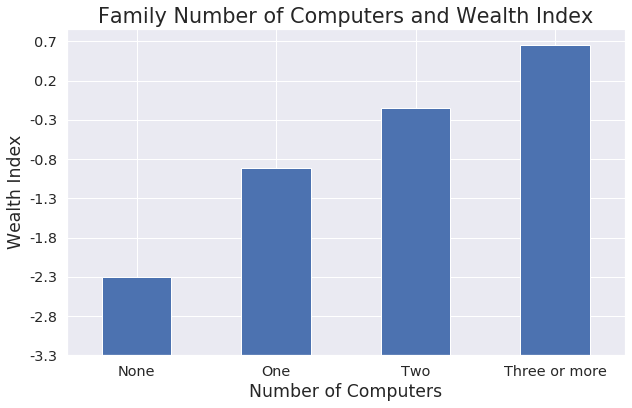

In [26]:
# Group data by var and calculate mean scores
data = df.groupby('Number of Computers')['Wealth Index'].mean()

minval = np.amin(data.values)
# Add offset for the lowest bar
minval += np.sign(minval)

data -= minval


# Add ytick formatter for our offset
def neg_tick(x, pos):
    return '%.1f' % (x + minval)


formatter = FuncFormatter(neg_tick)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

# Plot barplot
data.plot.bar(figsize=(10, 6), rot=0)
plt.ylabel('Wealth Index')
plt.title('Family Number of Computers and Wealth Index')

# Save
plt.savefig('img/computers_wealth.png', dpi=200, bbox_inches="tight")

We can notice a strong correlation between wealth index and the number of computers in a family.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The most surprising observation for me is that the programming rate has a bad influence on academic scores and this should be investigated more dipper. All other observations are obvious and confirm my earlier predictions.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Another interesting observation is the rating of countries by the number of wealthy students. I was surprised that Australia and Canada are higher than the USA in the rating.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!